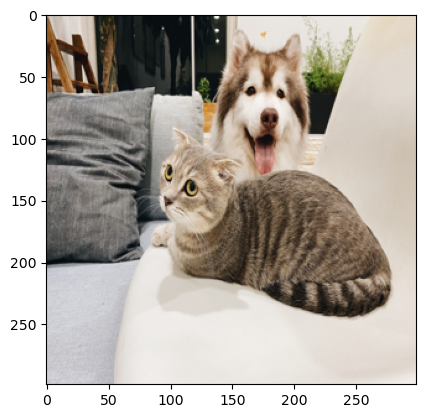

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
from PIL import Image

img=Image.open('dog_cat.jpg')
image=img.resize((299, 299))
image=tf.convert_to_tensor(image)
#print(image)
plt.imshow(image)
image=np.reshape(image,(1,299, 299, 3))

In [2]:
v3=tf.keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet')
input_image = tf.keras.Input([None, None, 3], dtype = tf.uint8)
x = tf.cast(input_image, tf.float32)
x = tf.keras.applications.inception_v3.preprocess_input(x)
x = v3(x)
model = tf.keras.Model(inputs=input_image, outputs=x)

In [3]:
preds=model.predict(image)
for x in preds.argsort()[0][-5:]:
    print(x,  preds[0,x])

1/1 [==============================] - 2s 2s/step
250 0.015409561
282 0.016838701
281 0.02171547
248 0.040528804
249 0.7147622


In [4]:
image=image[0]

from lime import lime_image
explainer = lime_image.LimeImageExplainer()

In [5]:
explanation = explainer.explain_instance(image, model.predict, top_labels=5, hide_color=0, num_samples=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 584ms/step


1/1 [==============================] - 1s 588ms/step


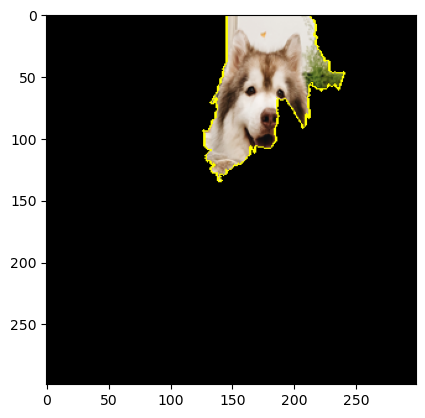

In [6]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(249, positive_only=True, num_features=5,
                                               hide_rest=True)
plt.imshow(mark_boundaries(temp/255, mask))

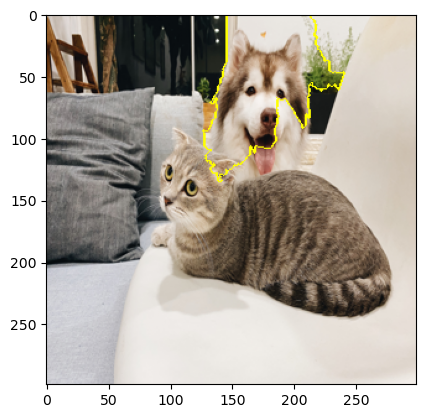

In [7]:
temp, mask = explanation.get_image_and_mask(249, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 255, mask))

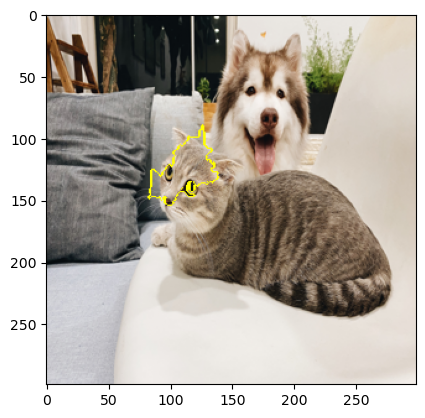

In [8]:
temp, mask = explanation.get_image_and_mask(249, positive_only=False,
                negative_only=True, num_features=15, hide_rest=False, min_weight=0.01)
plt.imshow(mark_boundaries(temp /255, mask))